>## __MLSA CAPSTONE PROJECT - THE TITANIC DATASET__
>### 1. *Importing and exploring the data*

In [1]:
import pandas as pd
import numpy as np
data =  pd.read_csv('datasets/titanic/train.csv') #importing the dataset as a dataframe

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

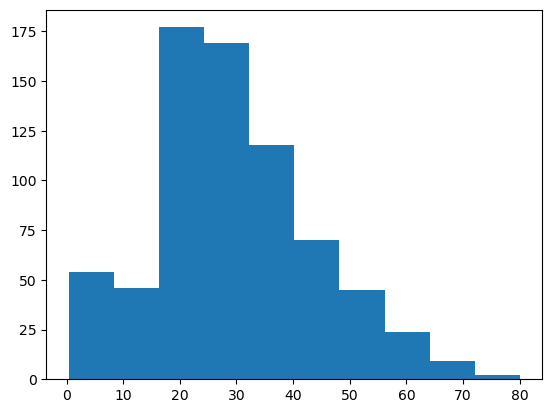

In [4]:
import matplotlib.pyplot as plt
plt.hist(data['Age'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
X = data.drop('Survived', axis = 1) #splitting the dataset into data and labels

In [22]:
y = data['Survived']

In [24]:
#splitting the dataset into train and test
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits = 1, test_size = 0.1, random_state = 42)
for train_index, test_index in splitter.split(data, data['Sex']):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y .iloc[test_index]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


>### 2. *Clean the data*

In [63]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

def bucketize(feat):
    out = pd.cut(feat[:,0], bins = [i for i in range(int(feat.min()-1),int(feat.max()),int(feat.max()/9))] + [np.inf], labels = [i for i in range(1,11)])
    out = np.reshape(out, (out.shape[0],1))
    return(out)
normal_pipeline = make_pipeline(SimpleImputer(strategy = 'mean'), FunctionTransformer(bucketize, feature_names_out='one-to-one'), StandardScaler())
pipeline_2 = make_pipeline(StandardScaler(), FunctionTransformer(feature_names_out = 'one-to-one'))
pipeline_3 = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder())
preprocessing = ColumnTransformer([('category', normal_pipeline, ['Age']), ('category2', normal_pipeline, ['Fare']), ('set2', pipeline_2, ['Pclass', 'SibSp', 'Parch']), 
                                  ('encode', pipeline_3, ['Sex', 'Embarked'])], remainder = 'drop')

In [65]:
a = preprocessing.fit_transform(X_train)

In [71]:
a = pd.DataFrame(a, columns = preprocessing.get_feature_names_out()) #preprocessed dataset


>### 3. *Trying different models*

In [112]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict

In [142]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 42)
LR.fit(a, y_train)

LogisticRegression(random_state=42)

In [148]:
cross_val_score(LR, a, y_train, cv = 4, scoring = 'accuracy') #Logistic Regression's Accuracy: 0.81

array([0.81094527, 0.8       , 0.785     , 0.815     ])

In [104]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth = 15, random_state = 42)
DTC.fit(a, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

In [106]:
cross_val_score(DTC, a, y_train, cv = 4, scoring = 'accuracy') #Decision Tree: 0.805

array([0.78109453, 0.805     , 0.8       , 0.76      ])

In [158]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_neighbors = 4)
KNC.fit(a, y_train)

KNeighborsClassifier(n_neighbors=4)

In [128]:
cross_val_score(KNC, a, y_train, cv = 4, scoring = 'accuracy') #KNN: 0.82

array([0.80099502, 0.8       , 0.795     , 0.82      ])

In [130]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
cross_val_score(dummy, a, y_train, cv = 4, scoring = 'accuracy') #Dummy: 0.615

array([0.6119403, 0.615    , 0.615    , 0.615    ])

In [134]:
from sklearn.model_selection import cross_val_predict
pred1 = cross_val_predict(KNC, a, y_train, cv=4)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, pred1)
cm

array([[456,  36],
       [121, 188]], dtype=int64)

In [164]:
from sklearn.ensemble  import RandomForestClassifier, VotingClassifier
rfc = RandomForestClassifier()
rfc.fit(a, y_train)

RandomForestClassifier()

In [140]:
cross_val_score(rfc, a, y_train, cv=4, scoring='precision') #Random Forests: 0.78

array([0.74285714, 0.75      , 0.74666667, 0.78571429])

In [160]:
from sklearn.svm import SVC
svc = SVC(random_state = 42)
svc.fit(a, y_train)

SVC(random_state=42)

In [162]:
cross_val_score(svc, a, y_train, cv=4, scoring='accuracy') #SVC: 0.845

array([0.83084577, 0.835     , 0.81      , 0.845     ])

In [212]:
voting = VotingClassifier(estimators = [('dtc1', DecisionTreeClassifier(max_depth = 15, random_state = 42)),
                                        ('svc1', SVC(random_state = 42)),
                                        ('svc2', SVC(random_state = 42)),
                                        ('svc3', SVC(random_state = 42)),
                                        ('svc4', SVC(random_state = 42)),
                                        ('lr2', LogisticRegression(random_state = 42)),
                                        ('rfc1', RandomForestClassifier())])
voting.fit(a, y_train)

VotingClassifier(estimators=[('dtc1',
                              DecisionTreeClassifier(max_depth=15,
                                                     random_state=42)),
                             ('svc1', SVC(random_state=42)),
                             ('svc2', SVC(random_state=42)),
                             ('svc3', SVC(random_state=42)),
                             ('svc4', SVC(random_state=42)),
                             ('lr2', LogisticRegression(random_state=42)),
                             ('rfc1', RandomForestClassifier())])

In [214]:
cross_val_score(voting, a, y_train, cv=4, scoring='accuracy') #Voting: 0.845 (Dosen't do much better than SVM)

array([0.83084577, 0.835     , 0.81      , 0.845     ])

In [234]:
from sklearn.ensemble import BaggingClassifier
BG = BaggingClassifier(SVC(), n_estimators = 500, max_samples=120, n_jobs = -2, random_state = 42,
                      bootstrap = True, oob_score = True)
BG.fit(a, y_train)

BaggingClassifier(estimator=SVC(), max_samples=120, n_estimators=500, n_jobs=-2,
                  oob_score=True, random_state=42)

In [236]:
cross_val_score(BG, a, y_train, cv=4, scoring='accuracy') #Bagging: 0.845 (Dosen't do much better than SVM)

array([0.80597015, 0.825     , 0.805     , 0.83      ])

>### 3. *Comparison of models using accuracy, precision and recall*

In [270]:
model_stats = []
for clf in [LR, svc, DTC, KNC, BG, voting]:
    stat = []
    for metric in ['accuracy', 'precision', 'recall']:
        stat.append(cross_val_score(clf, a, y_train, cv=4, scoring=metric).mean())
    model_stats.append(stat)
metric_data = pd.DataFrame(model_stats)

In [276]:
metric_data.columns = ['Accuracy', 'Precision', 'Recall']
metric_data.index = ['Logistic Regression', 'SVC', 'Decision Trees', 'KNN', 'Bagging', 'Voting Classifier']

In [278]:
metric_data

,Accuracy,Precision,Recall
Logistic Regression,0.802736,0.771606,0.698968
SVC,0.830211,0.819757,0.721653
Decision Trees,0.786524,0.785085,0.621295
KNN,0.803999,0.847968,0.608558
Bagging,0.816493,0.800943,0.702298
Voting Classifier,0.830211,0.819757,0.721653


> *So the best performing model is the SVM(Support Vector Machine), next I want to submit this model's predicton on kaggle:*

In [286]:
test =  pd.read_csv('datasets/titanic/test.csv') #importing test set
test = preprocessing.transform(test)
test_df = pd.DataFrame(test, columns = preprocessing.get_feature_names_out())
test_df

,category__Age,category2__Fare,set2__Pclass,set2__SibSp,set2__Parch,encode__Sex_female,encode__Sex_male,encode__Embarked_C,encode__Embarked_Q,encode__Embarked_S
0,0.530154,-0.318387,0.815668,-0.486506,-0.468823,0.0,1.0,0.0,1.0,0.0
1,1.144704,-0.318387,0.815668,0.413474,-0.468823,1.0,0.0,0.0,0.0,1.0
2,2.373802,-0.318387,-0.378756,-0.486506,-0.468823,0.0,1.0,0.0,1.0,0.0
3,-0.084395,-0.318387,0.815668,-0.486506,-0.468823,0.0,1.0,0.0,0.0,1.0
4,-0.698944,-0.318387,0.815668,0.413474,0.754393,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,-0.084395,-0.318387,0.815668,-0.486506,-0.468823,0.0,1.0,0.0,0.0,1.0
414,0.530154,0.867789,-1.573180,-0.486506,-0.468823,1.0,0.0,1.0,0.0,0.0
415,0.530154,-0.318387,0.815668,-0.486506,-0.468823,0.0,1.0,0.0,0.0,1.0
416,-0.084395,-0.318387,0.815668,-0.486506,-0.468823,0.0,1.0,0.0,0.0,1.0


In [302]:
gender_submission = pd.DataFrame({'PassengerId': range(892, 1310), 'Survived': svc.predict(test_df)})

In [312]:
gender_submission.to_csv('gender_submission.csv', index = False)

> *The model got an accuracy of 0.7751*